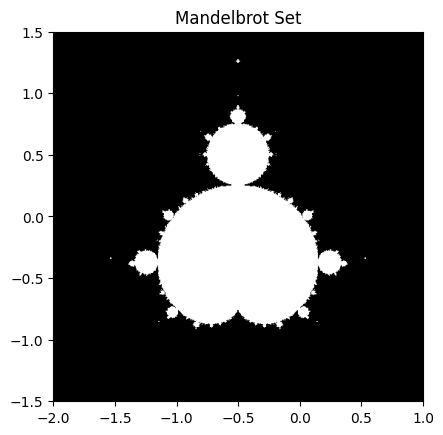

Transition matrix P:
[[0.74130693 0.0750865  0.14375915 0.03827006 0.00157737]
 [0.33107324 0.19924881 0.03241626 0.26431494 0.17294674]
 [0.22374964 0.26861068 0.24113051 0.15071024 0.11579894]
 [0.00214935 0.36210922 0.36440596 0.1821044  0.08923107]
 [0.01563839 0.35135473 0.37714465 0.24315967 0.01270256]]

Final distribution after 50 steps (p50):
[0.4143307  0.19348686 0.18662033 0.13675813 0.06880397]

Stationary distribution (v):
[0.4143307  0.19348686 0.18662033 0.13675813 0.06880397]

Component-wise difference:
[2.44804177e-13 8.74023076e-14 3.43336470e-14 7.42184092e-14
 4.43395320e-14]

Do they match within 1e-5? True


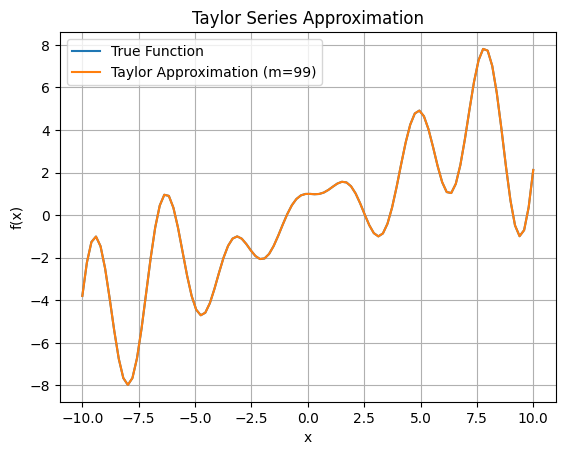

   degree  total absolute error  time (s)
0      50          4.949573e+01  0.150796
1      60          1.754248e-03  0.123289
2      70          1.319990e-07  0.138375
3      80          1.394495e-07  0.162342
4      90          1.394495e-07  0.196440
5     100          1.394495e-07  0.318660


In [5]:
# AMS 595 Project 4

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import pandas as pd
import time

# 1. Mandelbrot Set
def mandelbrot():
    # create grid of complex numbers over [-2, 1] x [-1.5, 1.5]
    x = np.linspace(-2, 1, 500)
    y = np.linspace(-1.5, 1.5, 500)
    X, Y = np.meshgrid(x, y)
    C = X + 1j * Y  # complex plane

    # initialize z to zero
    Z = np.zeros(C.shape, dtype=complex)

    # set threshold and number of iterations
    threshold = 50
    max_iter = 200

    # loop through iterations
    for i in range(max_iter):
        # apply the mandelbrot formula
        Z = Z**2 + C

        # mark points that have escaped beyond the threshold
        Z[np.abs(Z) > threshold] = threshold + 1

    # points that never escaped are part of the mandelbrot set
    mask = np.abs(Z) < threshold

    # plot the mandelbrot set
    plt.imshow(mask.T, extent=[-2, 1, -1.5, 1.5])
    plt.title("Mandelbrot Set")
    plt.gray()
    plt.savefig("mandelbrot.png")
    plt.show()

# 2. Markov Chain
def markov_chain():
    # create a random 5x5 transition matrix
    P = np.random.rand(5, 5)

    # normalize each row so that row sums = 1
    for i in range(5):
        P[i] = P[i] / np.sum(P[i])

    # create a random probability vector of size 5 and then normalize it
    p = np.random.rand(5)
    p = p / np.sum(p)

    # apply the transition rule p = P^T * p 50 times
    for i in range(50):
        p = np.dot(P.T, p)

    # store the result after 50 transitions
    p50 = p

    # find the eigenvector of P^T with eigenvalue closest to 1
    eigvals, eigvecs = np.linalg.eig(P.T)
    index = np.argmin(np.abs(eigvals - 1))
    v = np.real(eigvecs[:, index])

    # normalize eigenvector so that sum = 1
    v = v / np.sum(v)

    # compute component-wise difference between p50 and stationary distribution
    difference = np.abs(p50 - v)

    # print results
    print("Transition matrix P:")
    print(P)
    print("\nFinal distribution after 50 steps (p50):")
    print(p50)
    print("\nStationary distribution (v):")
    print(v)
    print("\nComponent-wise difference:")
    print(difference)
    print("\nDo they match within 1e-5?", np.all(difference < 1e-5))

# 3. Taylor Series Approximation
def taylor_series():
    # define the variable and function
    x = sp.Symbol('x')
    f = x * sp.sin(x)**2 + sp.cos(x)

    # set interval and parameters
    start = -10
    end = 10
    points = 100
    degree = 99
    c = 0  # expansion point

    # create numerical domain
    x_vals = np.linspace(start, end, points)

    # compute taylor series up to degree m = 99
    taylor_series = 0
    for n in range(degree + 1):
        deriv = sp.diff(f, x, n)  # nth derivative
        term = (deriv.subs(x, c) / sp.factorial(n)) * (x - c)**n
        taylor_series += term

    # convert symbolic expressions to numerical functions
    f_func = sp.lambdify(x, f, 'numpy')
    taylor_func = sp.lambdify(x, taylor_series, 'numpy')

    # evaluate both functions on the interval
    f_true = f_func(x_vals)
    f_approx = taylor_func(x_vals)

    # plot the true function and the taylor approximation
    plt.plot(x_vals, f_true, label="True Function")
    plt.plot(x_vals, f_approx, label="Taylor Approximation (m=99)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Taylor Series Approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig("taylor_plot.png")
    plt.show()

    # run multiple degrees and record error + time
    initial_degree = 50
    final_degree = 100
    degree_step = 10

    results = []

    for m in range(initial_degree, final_degree + 1, degree_step):
        start_time = time.time()

        # compute truncated taylor series
        series = 0
        for n in range(m + 1):
            deriv = sp.diff(f, x, n)
            term = (deriv.subs(x, c) / sp.factorial(n)) * (x - c)**n
            series += term

        # convert to numerical form and compute approximation
        series_func = sp.lambdify(x, series, 'numpy')
        f_approx = series_func(x_vals)

        # compute total absolute error
        error = np.sum(np.abs(f_true - f_approx))

        # record computation time
        elapsed = time.time() - start_time

        # store results
        results.append([m, error, elapsed])

    # create dataframe and save to csv
    df = pd.DataFrame(results, columns=["degree", "total absolute error", "time (s)"])
    df.to_csv("taylor_values.csv", index=False)
    print(df)

mandelbrot()
markov_chain()
taylor_series()